<a href="https://colab.research.google.com/github/helekar/ostwalprasad.github.io/blob/master/ONE_MAX_spacial_analysis_BBs_greedy_global_searchs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install deap

In [2]:
import random

# modules imported: deap.creator, deap.base, deap.tools, deap.algoritms
from deap import creator, base, tools, algorithms

# np.reshape() - for reshaping string/vector into BB-based strings/matrix
import numpy as np

import matplotlib.pyplot as plt 

toolbox = base.Toolbox()

minha_var_tour=8
minha_var=1000

In [3]:
# Functions locally implemented

def evalOneMax(individual):
#    return sum(individual),   # ',' to compose tuple structure that is required by other operations
    return sum(individual),0   # ',' to compose tuple structure that is required by other operations

def fTrap5(individual):
    u = sum(individual)
    if u < 5:
      return 4-u , 0
    else:
      return 5 , 0

def fNTrap5(individual,k=5): # the function works for k< 5 and k>5, be carefull in comprehend results of it
  f = 0
  #refactoring individual into building blocks (bbs) of size k, l//k bbs
  #bbs = np.reshape(individual, (-1, k)) # -1 --> other dimension size is free, and calculated for consistency
  #in the case l//k isn' integer, reshape() doesn't work
  l = len(individual)
  r = l//k # r BBs of size k
  small_bb = l%k 
  for i in range(0,l-l//k,k):
    #print(i)
    bbk = individual[i:i+k]
    x,__ = fTrap5(bbk)
    f += x
  if small_bb > 0:
    bbk = individual[i+k:i+small_bb]
    x,__ = fTrap5(bbk)
    f += x
  return f,0


In [4]:
individual=[0,1,0,1,0]
print(fNTrap5(individual))
individual=[0,0,0,0,0]
print(fNTrap5(individual))
individual=[1,1,1,1,1]
print(fNTrap5(individual))
#individual=[1,1,1,1,1,1,1]
#print(fNTrap5(individual,k=7))

(2, 0)
(4, 0)
(5, 0)


In [5]:
#from . import tools

def ch_bits(mk,k,all):
  mkt = mk[:]

  if k < len(mk)-1:
    ch_bits(mkt,k+1,all)

  while mk[k] == 1:
    mkt[k] = 0
    if k < len(mk)-1:
      m = ch_bits(mkt,k+1,all)
      k += 1
    #print(mkt)
    all += [mkt]
    return all

def gen_all_masks(i,j):
  mk = []
  for k in range(0,j-i+1):
    mk += [1]   
  all = [mk]
  ch_bits(mk,0,all)
  return all

def find_best_mask(all_m):
  max = 0;
  best_mask = []
  for m in all_m:
    #f,__ = fTrap5(m)
    #f,__ = evalOneMax(m)
    f,__ = toolbox.evaluate(m) #evalOneMax(m) or fNTrap5
    if f > max:
      max = f
      best_mask = m
  return best_mask;


def bb_exhaust(individual, toolbox, ip=0, jp=0, BEST_MASK = True):
  # effective copy of individual
  child = toolbox.clone(individual)

  if ip > jp:
    #print("\n BB, individual slice, with upper bound < lower bound \nGoing on with 1-size BB at ...", ip, jp)
    ip, jp = jp, ip;
  assert ip > -1, "\nlower bound of individual broken {} (loci) < {} (bound)".format(ip,0)
  assert jp < len(individual), "\nupper bound of individual broken {} (loci) > {} (bound)".format(jp,len(individual)-1)

  all_m = gen_all_masks(ip,jp)

  if BEST_MASK == False:
    i_m = random.randint(0, len(all_m) - 1)
    child[ip:jp+1] =  all_m[i_m]
  else:
    best_mask = find_best_mask(all_m)
    child[ip:jp+1] = best_mask
 
  #print("Only the best Building Block used? {}".format(BEST_MASK))
  return child


In [6]:

# gen_all_masks and find_best_mask working
# find_best() uses toolbox.evalute
#toolbox.register("evaluate", evalOneMax)
toolbox.register("evaluate", fNTrap5,k=5) # or just: toolbox.register("evaluate", fNTrap5)

individual = [0,1,0,1,0,1,0,1,0,1]

all_m = gen_all_masks(5,9)
print("\nAll masks with size {}: {}".format(len(all_m),all_m))
b = find_best_mask(all_m)
print("Best maks found:",b)

# if k < 5, u de fTrap5() < 5 --> return 4-u --> fTrap5 is computed naturally
all_m = gen_all_masks(0,3)
print("\nAll masks with size {}: {}".format(len(all_m),all_m))
b = find_best_mask(all_m)
print("Best maks found:",b)


all_m = gen_all_masks(0,5)
print("\nAll masks with size {}: {}".format(len(all_m),all_m))
b = find_best_mask(all_m)
print("Best maks found:",b)


All masks with size 32: [[1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 0], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 1], [0, 0, 1, 1, 1], [0, 1, 1, 1, 1]]
Best maks found: [1, 1, 1, 1, 1]

All masks with size 16: [[1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]]
Best maks found: [0, 0, 0, 0]

All masks with size 64: [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0

In [7]:
# bb_exaust() working

individual = [0,1,0,1,0,1,0,1,0,1]

#[0,1,0,1,0,1,0,1,0,1]
#[1,1,1,1,1,1,1,1,1,1]

print(individual)
child = bb_exhaust(individual, toolbox, 5, 9) # the best BB for individual
#child = bb_exhaust(individual, toolbox, 5, 9, False) # a random instance of BB for individual
#child = bb_exhaust(individual, toolbox, 8, 9) # the best BB for individual
# Note: BB size < 5 --> u (da fTrap5) < 5 --> melhor opção é 0...0
# NOte: BB size !< 5 --> u (da fTrap5) >= 5 --> melhor opção é 1...1

#For prevention and aiding in debugging, the cases below were treated: 
#child = bb_exhaust(individual, toolbox, 10, 9)
#child = bb_exhaust(individual, toolbox, -1, 9) 
#child = bb_exhaust(individual, toolbox, 8, 10)
print(child)

#other simple case that result should change when using fNTrap5() or evalOneMax()
#bb_indiv larger than individual can be used, but not vice versa  
#print()
#individual = [0]
#print(individual)
#bb_indiv = np.array([[0],[1]])
#child = bb_exhaust(individual, toolbox, 0, 0)
#print(child)
#individual = [0,0]
#print(individual)
#bb_indiv = np.array([[0],[1]])
#child = bb_exhaust(individual, toolbox, 0, 1)
#print(child)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [8]:
def mutFlipBB(individual, indpb, bb_indiv=[[]]):
    """Flip the value of the attributes of the input individual and return the
    mutant ACCORDING TO ALL BUILDING BLOCKS (BB) POSSIBLE values. 
    The *individual* is expected to be a :term:`sequence` and the values of the
    attributes shall stay valid after the ``not`` operator is called on them.
    The *indpb* argument is the probability of each attribute to be
    flipped. This mutation is usually applied on boolean individuals.

    :param individual: Individual to be mutated.
    :param indpb: Independent probability for each attribute to be flipped.
    :param bb_loc: INDIVIDUAL REFACTORED INTO BBs, MATRIX WIHT A ROW FOR EACH BB
    :returns: A tuple of one individual.

    This function uses the :func:`~random.random` function from the python base
    :mod:`random` module.
    """

    #offspring = individual[:] #in case, it suffers/receives no modification
    offspring = toolbox.clone(individual)

    NO_BB_TEMPLATE = False
    if len(bb_indiv) != 0:
      if len(bb_indiv[0]) == 0: #bb_indiv = [[]] (bb_indiv is not empyt, the its first row is)
        NO_BB_TEMPLATE = True
    else:
      NO_BB_TEMPLATE = True #bb_indiv = []
    
    bb_max_size = 10 #the largest acceptable size for a BB
    if NO_BB_TEMPLATE == True: #choose a random BB with bb_max_size
      #randomly choose a slice of individual 
      ip = random.randint(0, len(offspring) - 1)
      jp = random.randint(0, len(offspring) - 1)
      if ip > jp:
        ip, jp = jp, ip
        #!!!!!!!!!!!!!!!!!!
        # bb_max_size constraint must be considered 
        #!!!!!!!!!!!!!!!!!!
      #find the best from offspring and save it as individual
      offspring = bb_exhaust(offspring, toolbox, ip, jp)
      return offspring,
    else:
       #r,c = bb_indiv.shape #short for: r,c = list(bb_indiv.shape)
       r = len(bb_indiv) # in case of ragged arrays - non-uniform BB sizes
       jb = -1
       for ip in range(0,r): 
         jp = len(bb_indiv[ip])-1  #supposedly BBs can possess different sizes
         if random.random() <= indpb: #a chance to perform a BB-based mutation
           #setup indixes (ib,jb) for the next BB of individual
           ib = jb+1
           jb = ib+jp
           #find the best from offspring and save it as individual
           offspring = bb_exhaust(offspring, toolbox, ib, jb )
          #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
          #IN CASE THE bb_indiv is smaller then individual
          #the remaining of individual could be treat as NO_BB_TEMPLATE=True, as above "else:"
          #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
       return offspring,


In [9]:
# mutFlipBB() working

individual = [0,1,0,1,0,1,0,1,0,1]
#refactoring individual into building blocks (bbs) of size k, l//k bbs
#k = 5
#indpb = 0.1
#bb_indiv = np.reshape(individual, (-1, k)) # -1 --> other dimension size is free, and calculated for consistency
#print(bb_indiv)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

#print()
#bb_indiv = np.array([[0,1,0],[1,0,1,0],[1],[0,1]])
#print(bb_indiv)
#print(bb_indiv.shape)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

#print()
#bb_indiv = np.array([[0,1,0,1,0],[1,0],[1],[0,1]])
#print(bb_indiv)
##print(bb_indiv.shape)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

#print()
#bb_indiv = [] #Note [[]] has one row (list) with zero columns
#print(len(bb_indiv))
##print(bb_indiv.shape)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

#print()
#bb_indiv = np.array([[0,1],[0,1],[0,1],[0,1],[0,1]])
#print(len(bb_indiv))
##print(bb_indiv.shape)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

#individual = [0,0,0,0,0,0,0]
##individual = [0] # !!!!!! individual smaller than bb_indiv isn't treated !!!!!
#print()
##bb_indiv = np.array([[0],[1],[0],[1]])
#bb_indiv = np.array([[0],[1],[0],[1],[1],[0],[1]])
##bb_indiv = np.array([[0]])
#print(len(bb_indiv))
##print(bb_indiv.shape)
#child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
#print(child)

individual = [0,0,0,0,0,1,1,1,1,1]
bb_indiv = [[0,1,0,1,0],[1,0,1,0,1]]
child = mutFlipBB(individual, indpb=1.0, bb_indiv=bb_indiv)
print(child)



([1, 1, 1, 1, 1, 1, 1, 1, 1, 1],)


In [10]:
#import random
#
## modules imported: deap.creator, deap.base, deap.tools, deap.algoritms
#from deap import creator, base, tools, algorithms
#
## np.reshape() - for reshaping string/vector into BB-based strings/matrix
#import numpy as np 

# it imports classes and creates/instantiates them
##creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("FitnessMax", base.Fitness, weights=(1.0,1.0))
# Fitness class was importanted from base module of deap and instatiate wiht name FitnessMax
# only one objective is used for maximization: +1.0 in the tuple

creator.create("Individual", list, fitness=creator.FitnessMax)
# object with name "Individual" is created composing:
#  a list and 
#  an atribute fitness 
#     fitness is initialized with FitnessMax recently created

#toolbox = base.Toolbox()
# alias to base.Toolbox in order to construct the basic object for evoltuion
# (the basic operators according to the evolutionary algorithm designed by a practitioner)

toolbox.register("attr_bool", random.randint, 0, 1)
# defines/stores objects to instantiate atributes/variables, in this case, boolean

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=minha_var)
# defines/stores objects to instantiate individulas
# includes:
#    method for initialization of atributes
#        initRepeat (SEE CODE OF initRepeat in 'tools' of Evolutionary Tools / Operators of deap) 
#        must be applied to individuals of type creator.Individual 
#        whose atributes are of type attr_bool 

######toolbox.register("population", tools.initRepeat, list, toolbox.individual,n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# defines/stores a population object, 
# which uses initRepeat to initialize (consistent with individual initialization)
# the data structure of its individulas as lists (consistent with individuals)
# finally, the data structure of individual, that is list with fitness=creattor.FitnessMax
#
# note: list and toolbox.individual are the first two paramters of 
# initRepeat(container, func, n)
# then, n was not provide when creating the "population" object

#individual = [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]
individual = [0,0,0,0,0,1,1,1,1,1]

#
# BB Template
#
# BB template is a kind of previous knowledge from problem domain
# Linkage learning, from DAMICORE + Bayeasin Network, constructs BB-template approximations
#
# All BBs with size one means no linkage Knowledge: [[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]]
#   * one-sized BBs with mutFlipBB implies Local Search - a greedy algorithm
#
# All BBs with size one, [[0],[0],[0],[0],[0],[1],[1],[1],[1],[1]], is a type of linkage Knowledge 
# meaning probably independent variables: 
#   * a greedy search solve it fast, O(l), l = individual size
#     * use mutFlipBB with one-sized BB template in this code to run a greedy search
#   * a simple GA should not be far from a greedy algorithm performance, although slower and withoug optimal guarantee
#      * use tools.mutFlipBit in this code to run a simple GA
#

#bb_indiv = [[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0],[1,0,1,0,1],[1,0,1,0,1]]
#bb_indiv = [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[0],[1],[1],[0],[1],[0],[1]]
bb_indiv = [[0,1,0,1,0],[1,0,1,0,1]]
#bb_indiv = [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1]]
#print("fitness of {} is {} ".format( individual, fNTrap5(individual,5) ))
print("fitness of {} is {} ".format( individual, evalOneMax(individual) ))

toolbox.register("evaluate", evalOneMax)
#toolbox.register("evaluate", fNTrap5,k=5) # or just: toolbox.register("evaluate", fNTrap5)

# next, relating toolbox (base.py) to tolls (module Tools with Evolutionary Operatiors)
toolbox.register("mate", tools.cxTwoPoint)# see GA Crossovers in crossover.py from Evolutionary operators Tools - deap.tools

toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)# see GA Mutations in mutation.py from Evolutionary operators Tools - deap.tools
#tools.register("myFunc", func, 2, c=4)
#tools.myFunc(3)
#toolbox.register("mutate", mutFlipBB, indpb=1.0, bb_indiv=bb_indiv)# see code o mutFlipBB() in this notebook

toolbox.register("select", tools.selTournament, tournsize=minha_var_tour)# see Selections in selection.py from Evolutionary operators Tools - deap.tools

population = toolbox.population(n=100) # since n wasn't setup when creating "population"
#####population = toolbox.population() # in such a case, n was previously setup when creating "population"


fitness of [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] is (5, 0) 


In [11]:
# show the objective function and mutatin operator setup in the above constructed Evolutionary Algorithm
print(toolbox.evaluate)
print(toolbox.mutate)

functools.partial(<function evalOneMax at 0x7f6ea843ef28>)
functools.partial(<function mutFlipBit at 0x7f6ea8429d08>, indpb=0.05)


In [12]:
# Evolutionary Algorithm runs

NGEN=1
#bb_indiv = [[0,1,0,1,0],[1,0,1,0,1],[0,1,0,1,0],[1,0,1,0,1],[1,0,1,0,1]]
#bb_indiv = [[0,1,0,1,0],[1,0,1,0,1],[1,0,1,0,1]] # BB template used when no linkage learning available
for gen in range(NGEN):
    # crossover + mutation according to toolbox objects created through register from deap.base - toolbox
    #offspring = algorithms.varAnd(population, toolbox, cxpb=0.0, mutpb=1.0) #, bb_indiv=bb_indiv argument not acceptable by algorithms.varAnd()
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.1) #, bb_indiv=bb_indiv argument not acceptable by algorithms.varAnd()
    #print(offspring)

    # it makes a iterator that computes toolbox.evaluate function from the elements of each of the iteratables, in the case, just offspring
    # in this case, it traverses offsprint evaluating according to evalOneMax 
    fits = toolbox.map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring): # zip object and returns a tuple that next() traverses
        ind.fitness.values = fit
        #print(fit)
        #print(ind)
    population = toolbox.select(offspring, k=len(population))

print(population)


[[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

**Analyzing results**

> Begining of the spatial analysis
>> **One-Max problem**
>>> Plot fitness distributions

>>> Test
>>>> n = 10, 100, 1000 (l - comprimento do cromossomo)
>>>>> for each n, try
>>>>>> selecting 1/2 (torneio 2), 1/4 (torneio 8), 1/8 (torneio 8) of offspring

>>> Repeat above test sequence (Tamanho da População de 100)
>>>> Simple GA (1 PONTO CXPB=0.7 / FLIPBIT MUTPB=0.1)

>>>> BB-based mutation
>>>>> Test several templates of BBs
>>>>> at least
>>>>>> one-sized BBs

>>>>>> five-sized BBs

>> **Deceptive objective function** with fTrap5's
>>> Repeat the complete Test sequence done for One-Max Problem  

> Report your conclusions

In [13]:
def two_hist_plot(x,y):
  import random
  import numpy
  from matplotlib import pyplot

#  x = [random.gauss(3,1) for _ in range(400)]
#  y = [random.gauss(4,2) for _ in range(400)]
  bins = numpy.linspace(0, minha_var, 100)

  pyplot.hist(x, bins, alpha=0.5, color='b', label='population') # colors: b-blue, g-green, r-red, c-cyan, m-magenta, y-yellow, k-black, w-white
  pyplot.hist(y, bins, alpha=0.5, color='m', label='selected')
  pyplot.legend(loc='upper right')
  pyplot.show()

In [14]:
# Multimodal fitting for curve tail

def multimodalpoptail_plot(p,t):

  from sklearn.neighbors import KernelDensity
  from scipy.stats import gaussian_kde
  from statsmodels.nonparametric.kde import KDEUnivariate
  from statsmodels.nonparametric.kernel_density import KDEMultivariate

  # Note that the bandwith selection is an important piece of KDE.
  kde1 = gaussian_kde(t, bw_method=0.5)
  x_eval = np.linspace(0, minha_var, num=50)

  kde2 = gaussian_kde(p, bw_method=0.5)
  x_eval = np.linspace(0, minha_var, num=50)

  fig = plt.figure()
  ax = fig.add_subplot(111)

  ax.plot(x_eval, kde2(x_eval), 'b-', label="Scott's Rule")
  ax.plot(x_eval, kde1(x_eval), 'm-', label="Scott's Rule")

  plt.show()

1000 8


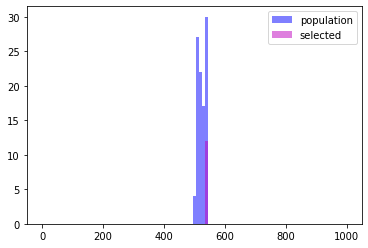

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


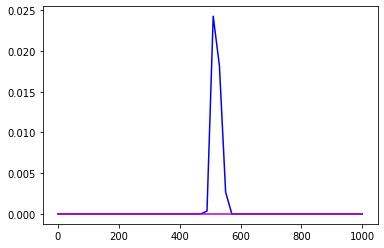

In [15]:
p = []
for i in population:
  f1,fother = i.fitness.values
  p += [f1]
#print(p)

if minha_var_tour == 2:
  print(minha_var,minha_var_tour)
  tophalf = tools.selBest(population, k=len(population)//2)
elif minha_var_tour == 4:  
  print(minha_var,minha_var_tour)
  tophalf = tools.selBest(population, k=len(population)//4)
else:
  print(minha_var,minha_var_tour)
  tophalf = tools.selBest(population, k=len(population)//8)

t = []
for i in tophalf:
  f1,fother = i.fitness.values
  t += [f1]
#print(t)

two_hist_plot(p,t)   

multimodalpoptail_plot(p,t) 
